In [591]:
import glob
import numpy as np
import scipy.misc
from scipy.special import expit
from matplotlib import pyplot as plt
%matplotlib inline

In [592]:
def load_image(fn, xshift=0, yshift=0, downsample=8, transpose=False):
    x = scipy.misc.imread(fn).astype('float32') / 255.
    m = int(min(x.shape[:2]) / 2)
    xc, yc = [int(s / 2) for s in x.shape[:2]]
    xc += xshift
    yc += yshift
    y = x[xc - m: xc + m, yc - m: yc + m, :]
    if downsample:
        y = y[::downsample, ::downsample, :]
    if transpose:
        y = y.transpose((2, 0, 1))
    assert y.shape[0] == y.shape[1]
    # grey = y.mean(axis=0)
    # flatten = np.ravel(grey)
    return y


def load_all(fns):
    X = np.array([load_image(fn, yshift=-150) for fn in fns])
    return X

In [593]:
X = load_all(sorted(glob.glob("/Users/chrismoody/Downloads/frames/*")))

In [831]:
mask = np.load("./checkpoint2.npz")["mask"]
fg = np.load("./checkpoint2.npz")["fg"]
bg = np.load("./checkpoint2.npz")["bg"][0]

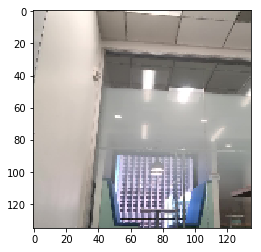

In [832]:
plt.imshow(X[-1])

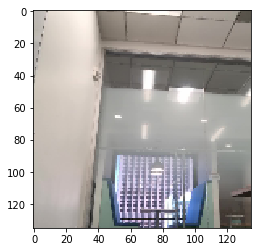

In [833]:
plt.imshow(expit(bg))

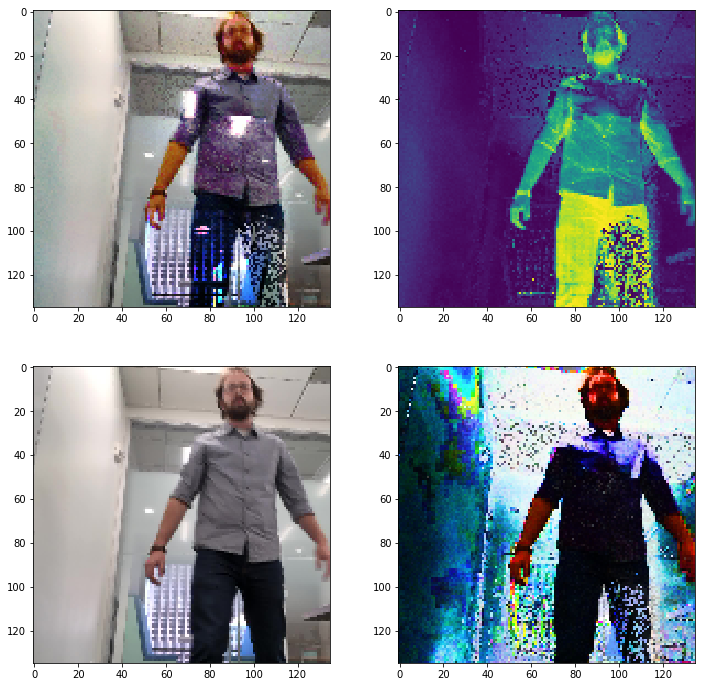

In [845]:
#axs = plt.subplots(1, 2)
f = 50
_, axs = plt.subplots(2, 2, figsize=(12, 12))

plt.sca(axs[0, 0])
plt.imshow(expit(bg + fg[f] * mask[f][..., None]))
plt.sca(axs[0, 1])
plt.imshow(mask[f])
plt.sca(axs[1, 0])
plt.imshow(X[f])
plt.sca(axs[1, 1])
plt.imshow(expit(fg[f]))

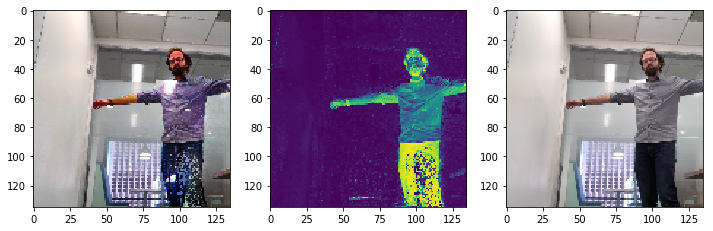

In [841]:
#axs = plt.subplots(1, 2)
f = 150
_, axs = plt.subplots(1, 3, figsize=(12, 12))

plt.sca(axs[0])
plt.imshow(expit(bg + fg[f] * mask[f][..., None]))
plt.sca(axs[1])
plt.imshow(mask[f])
plt.sca(axs[2])
plt.imshow(X[f])

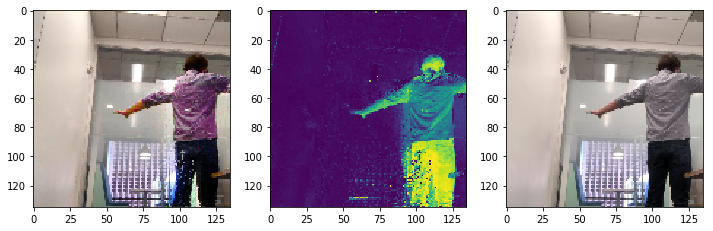

In [840]:
#axs = plt.subplots(1, 2)
f = 250
_, axs = plt.subplots(1, 3, figsize=(12, 12))

plt.sca(axs[0])
plt.imshow(expit(bg + fg[f] * mask[f][..., None]))
plt.sca(axs[1])
plt.imshow(mask[f])
plt.sca(axs[2])
plt.imshow(X[f])